In [2]:
import pandas as pd
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


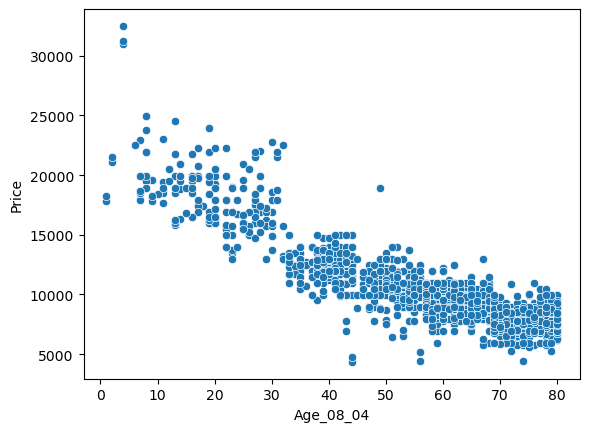

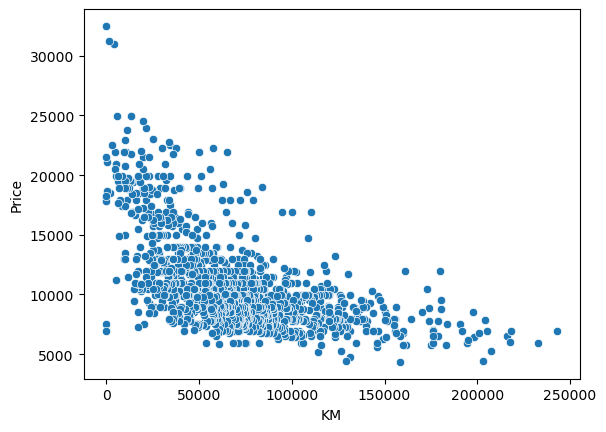

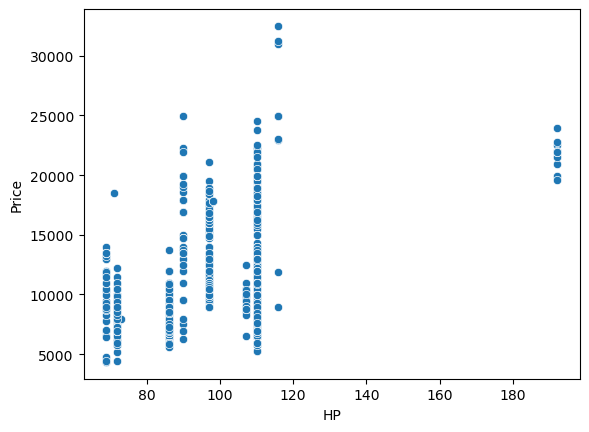

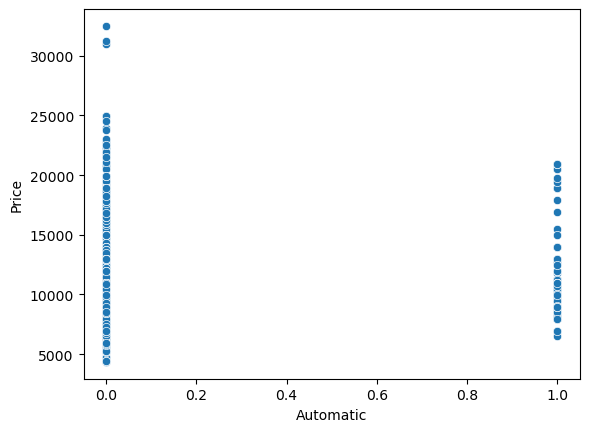

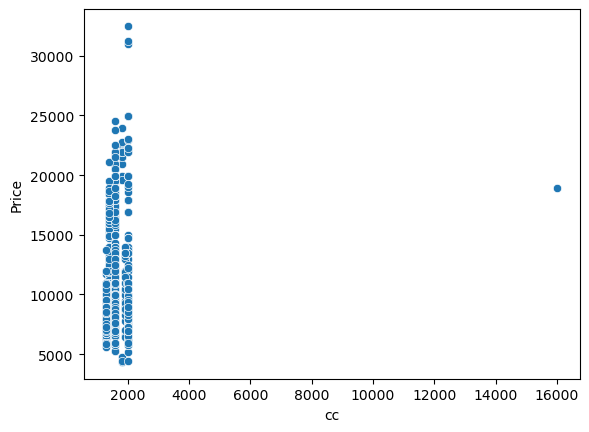

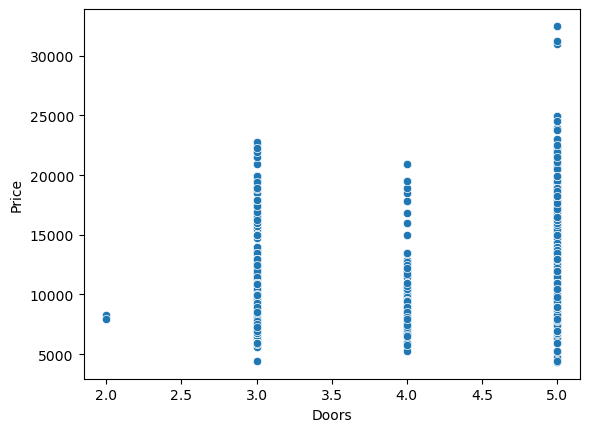

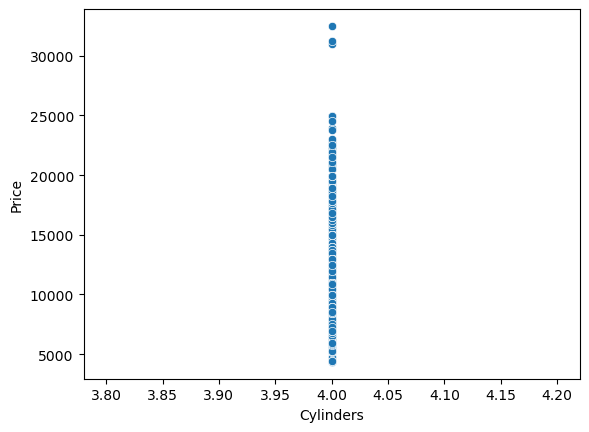

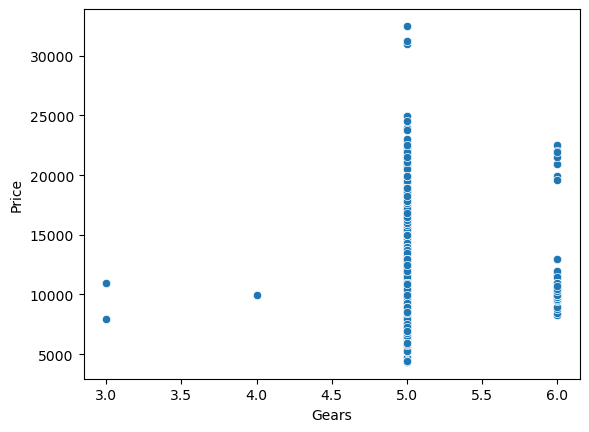

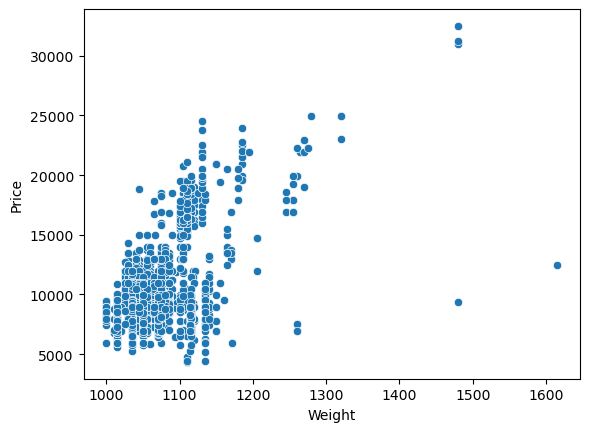

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'Price':
        sns.scatterplot(x=col, y='Price', data=df)
        plt.show()

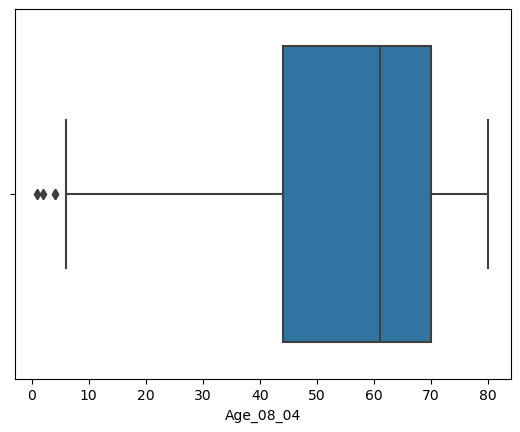

C:\Users\sowmy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


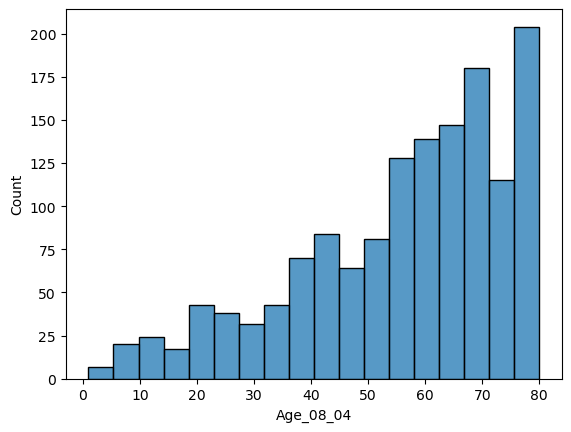

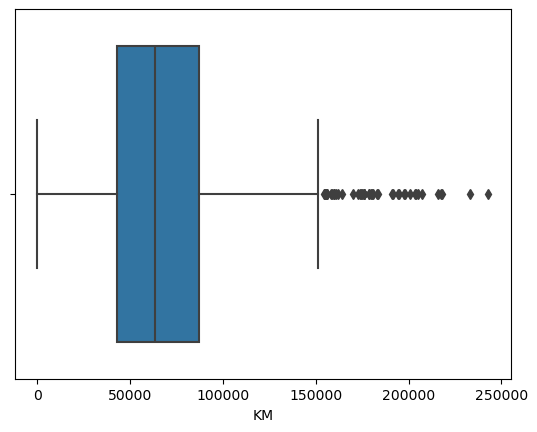

C:\Users\sowmy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


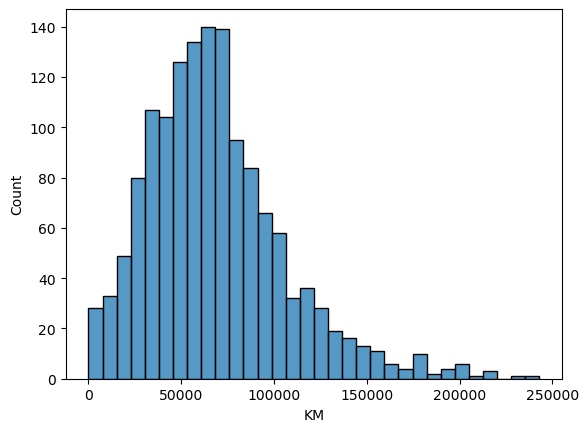

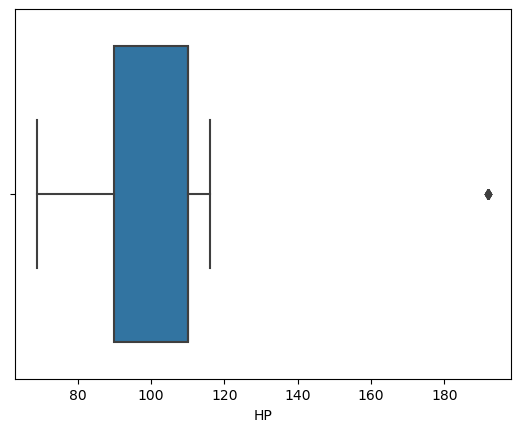

C:\Users\sowmy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


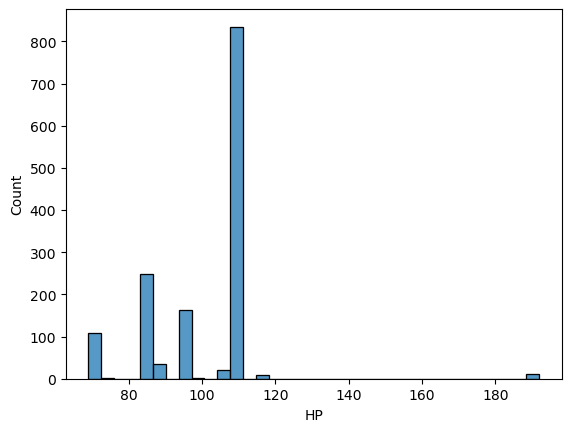

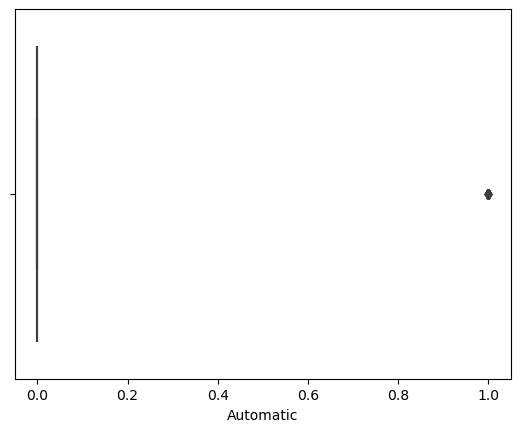

C:\Users\sowmy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


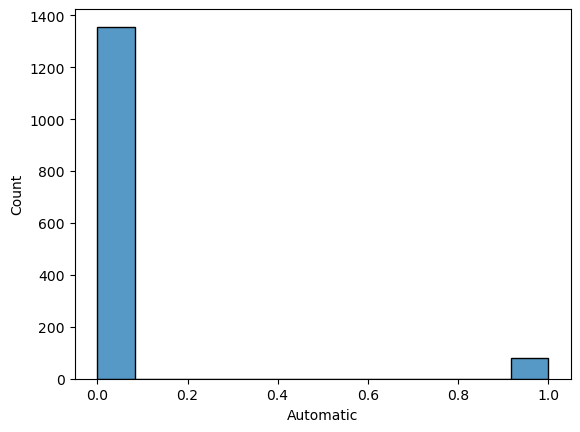

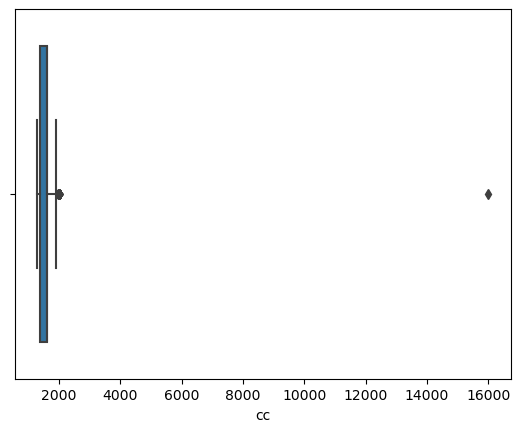

C:\Users\sowmy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


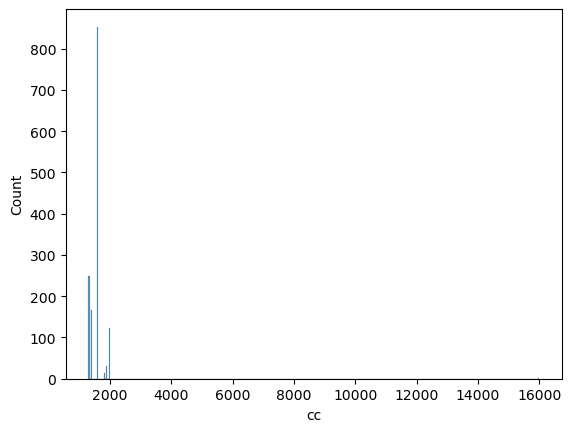

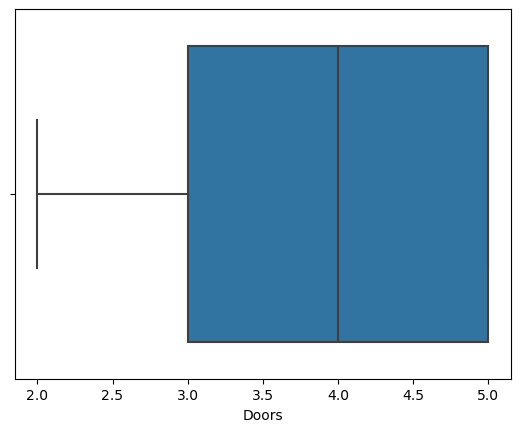

C:\Users\sowmy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


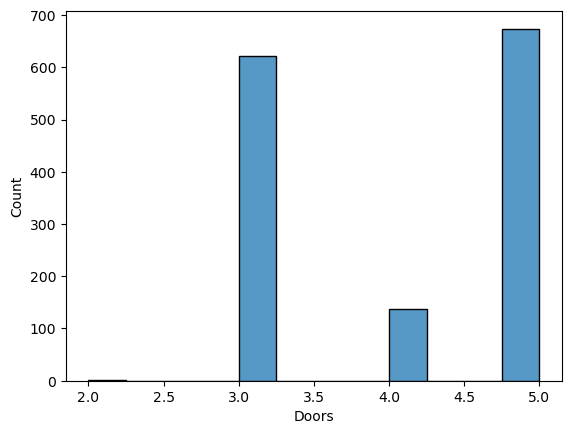

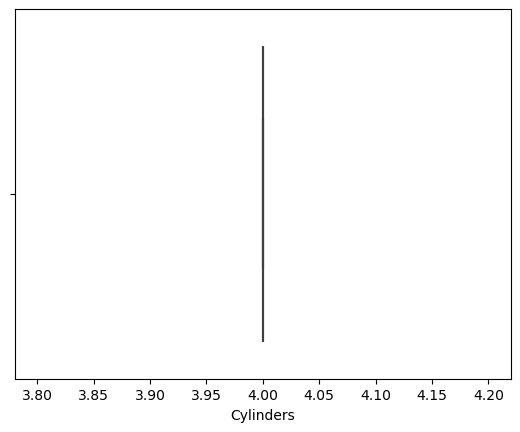

C:\Users\sowmy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


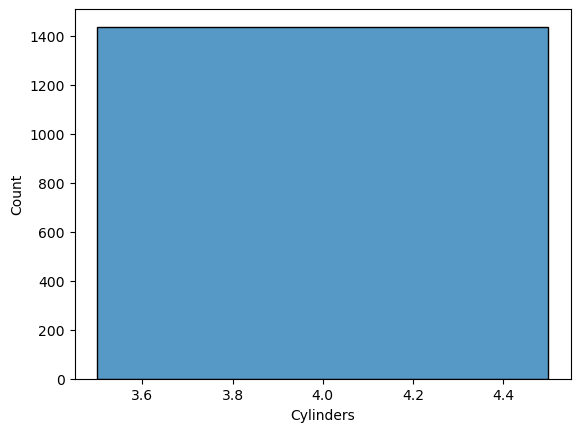

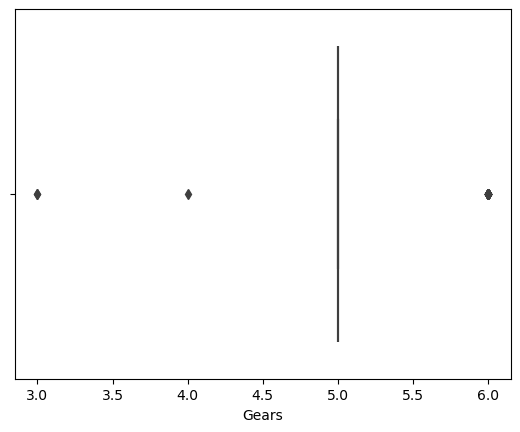

C:\Users\sowmy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


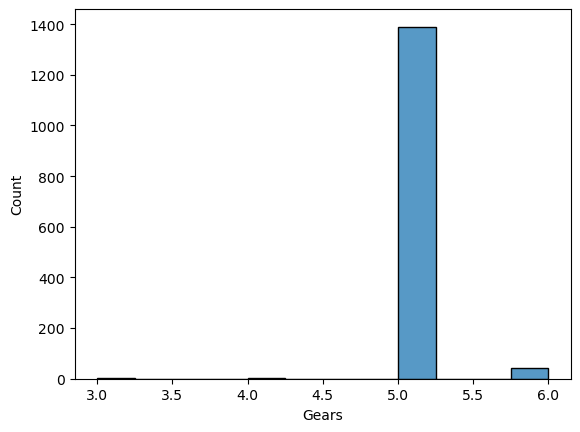

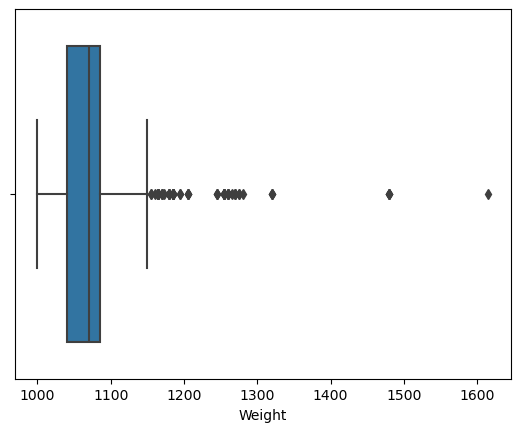

C:\Users\sowmy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


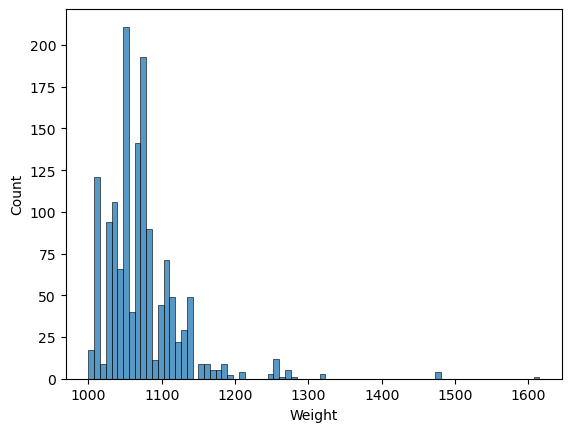

In [5]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'Price':
        sns.boxplot(x=df[col])
        plt.show()
        sns.histplot(df[col])
        plt.show()

In [6]:
import pandas as pd

# Identify columns with mixed data types
mixed_cols = df.select_dtypes(include=["object"]).columns[df.select_dtypes(include=["object"]).applymap(lambda x: x.isdigit()).any()]

# Convert mixed columns to numeric
for col in mixed_cols:
  df[col] = pd.to_numeric(df[col], errors="coerce")

# Verify data types after conversion
df.dtypes

C:\Users\sowmy\AppData\Local\Temp\ipykernel_122232\3863263258.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mixed_cols = df.select_dtypes(include=["object"]).columns[df.select_dtypes(include=["object"]).applymap(lambda x: x.isdigit()).any()]


Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [7]:
# Identify numerical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Calculate z-scores for each numerical column
z_scores = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

# Define outlier threshold
threshold = 3

# Find rows with outliers
outliers = df[z_scores.abs() > threshold]

# Treat outliers by replacing them with the median
for col in numeric_cols:
  median = df[col].median()
  df[col] = df[col].where(~(z_scores[col].abs() > threshold), median)

# Verify that outliers have been treated
df.describe()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.000000,1436.0,1436.0,1436.000000
mean,10478.655292,55.947075,66763.457521,100.873955,0.0,1566.827994,4.033426,4.0,5.0,1067.501393
std,3135.842475,18.599988,34186.919712,12.720534,0.0,187.182436,0.952677,0.0,0.0,37.529853
min,4350.000000,1.000000,1.000000,69.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000
50%,9900.000000,61.000000,63358.750000,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000
75%,11750.000000,70.000000,85062.750000,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1083.250000
max,21500.000000,80.000000,180638.000000,116.000000,0.0,2000.000000,5.000000,4.0,5.0,1205.000000


In [8]:
# convert categorical columns to dummy variables using one hot encoding method

df = pd.get_dummies(df, columns=["Fuel_Type"])

In [9]:
Y=df["Price"]

In [ ]:
X=df[["Age_08_04"]]

In [10]:
X=df[["Age_08_04","Weight"]]

In [ ]:
X=df[["Age_08_04","Weight","KM"]]

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)

LR.coef_

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(Y,Y_pred)
print("Mean squared error:", mse.round(3))
print("Root Mean squared error:", np.sqrt(mse).round(3))
print("R square:", r2_score(Y,Y_pred).round(3))

Mean squared error: 2953754.635
Root Mean squared error: 1718.649
R square: 0.699


In [12]:
Y = df["Weight"]
X = df[["Age_08_04"]]

import statsmodels.formula.api as smf
model = smf.ols('Y ~ X',data=df).fit()
model.summary()
model.rsquared.round(2)
r2 = model.rsquared
VIF = 1 / (1-r2)
print("VIF value: ", VIF)

VIF value:  1.2143859997383533
